## Importando librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Nuestro set de datos

In [2]:
#Configurar Kaggle
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

#Descargar dataset de Kaggle
!kaggle datasets download -d nih-chest-xrays/sample

#Descomprimir el archivo descargado
!unzip sample.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nih-chest-xrays/sample
License(s): CC0-1.0
sample.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sample.zip
replace sample/images/00000013_005.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
data = pd.read_csv('sample_labels.csv')
print(data.head())

        Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                3056                 2544           

In [4]:
# Cargo las imágenes y procesa los datos
images = []
labels = []
for index, row in data.iterrows():
    img = cv2.imread(os.path.join('sample/sample/images', row['Image Index']))
    img = cv2.resize(img, (128, 128))  # Redimensiono las imágenes a un tamaño común
    images.append(img)
    label = row['Finding Labels']
    if label == 'No Finding':
        labels.append(0)  # No hallazgos
    else:
        labels.append(1)  # Hallazgos (cualquier otra clase presente en mi dataset)
images = np.array(images)
labels = np.array(labels)

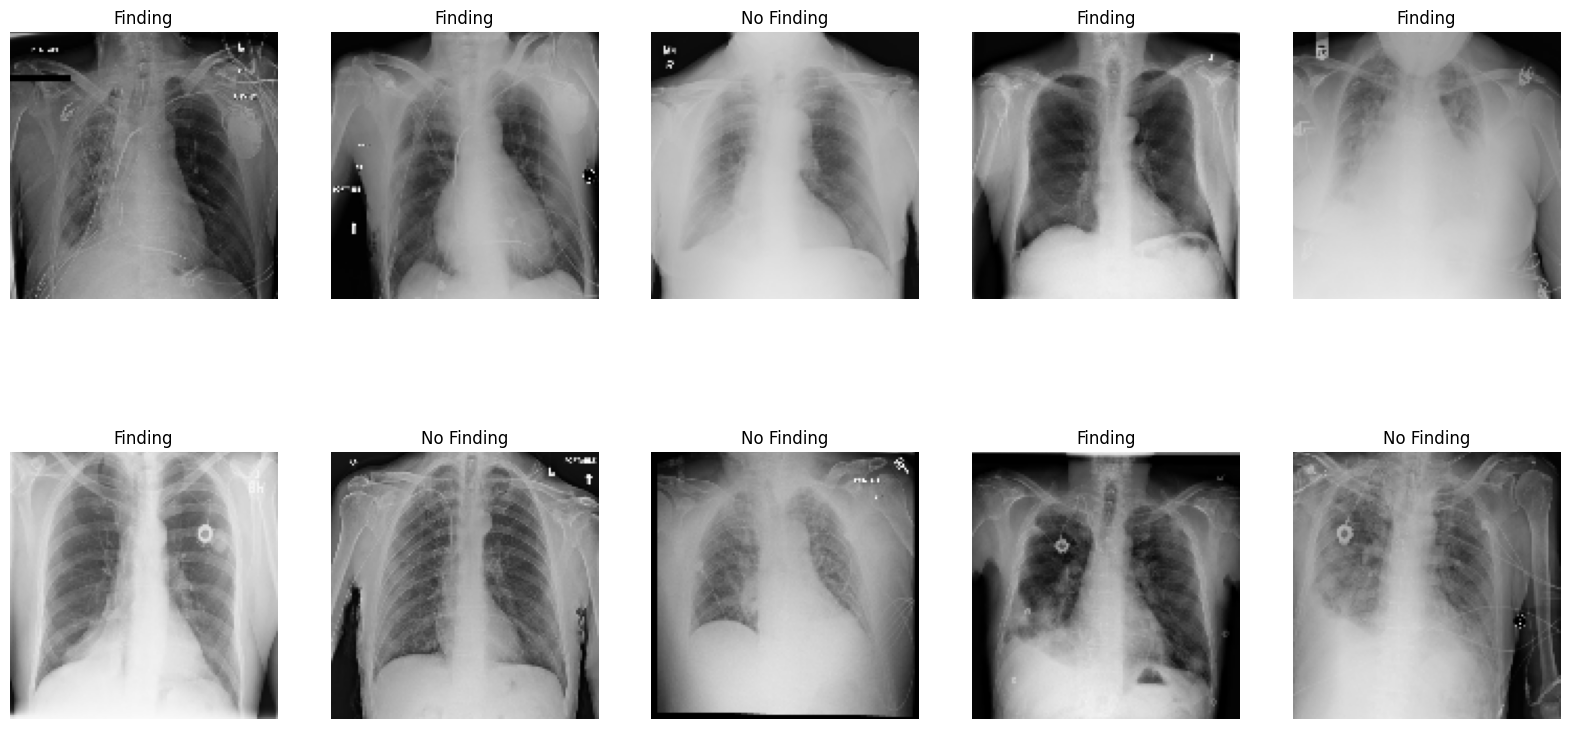

In [5]:
# Función para mostrar imágenes con etiquetas
def show_images_with_labels(images, labels, num_samples=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title('Finding' if labels[i] else 'No Finding')
        plt.axis("off")

# Visualizar 10 muestras de las imágenes originales
show_images_with_labels(images, labels, num_samples=10)

In [6]:
# Preprocesamiento de los datos
X = images / 255.0  # Normalizar las imágenes

##Creando el modelo


In [9]:
# Defino la arquitectura del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [11]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

## Entrenando el modelo

In [13]:
modelo_entrenado = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
141/141 [==============================] - 11s 34ms/step - loss: 0.7121 - accuracy: 0.5560 - val_loss: 0.6690 - val_accuracy: 0.5660
Epoch 2/10
141/141 [==============================] - 3s 25ms/step - loss: 0.6599 - accuracy: 0.6057 - val_loss: 0.6624 - val_accuracy: 0.6248
Epoch 3/10
141/141 [==============================] - 3s 22ms/step - loss: 0.6467 - accuracy: 0.6392 - val_loss: 0.6542 - val_accuracy: 0.6176
Epoch 4/10
141/141 [==============================] - 3s 22ms/step - loss: 0.6379 - accuracy: 0.6492 - val_loss: 0.6620 - val_accuracy: 0.6096
Epoch 5/10
141/141 [==============================] - 3s 23ms/step - loss: 0.6244 - accuracy: 0.6581 - val_loss: 0.6580 - val_accuracy: 0.6212
Epoch 6/10
141/141 [==============================] - 3s 24ms/step - loss: 0.6082 - accuracy: 0.6715 - val_loss: 0.7080 - val_accuracy: 0.6025
Epoch 7/10
141/141 [==============================] - 3s 22ms/step - loss: 0.5843 - accuracy: 0.6929 - val_loss: 0.7414 - val_accuracy: 0.598

## Evaluando el modelo sobre data de test

---



36/36 [==============================] - 0s 10ms/step - loss: 0.8914 - accuracy: 0.5954
Loss: 0.8914356231689453
Accuracy: 0.5953654050827026


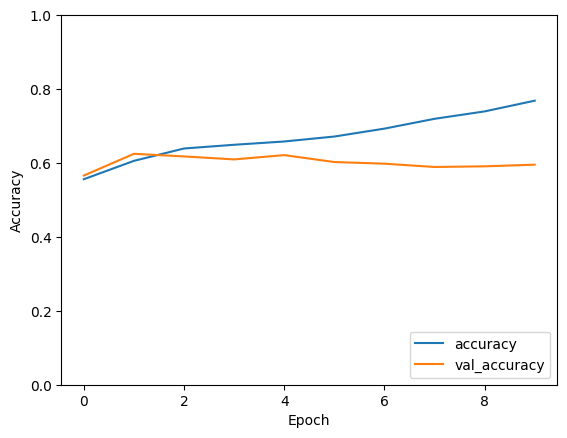

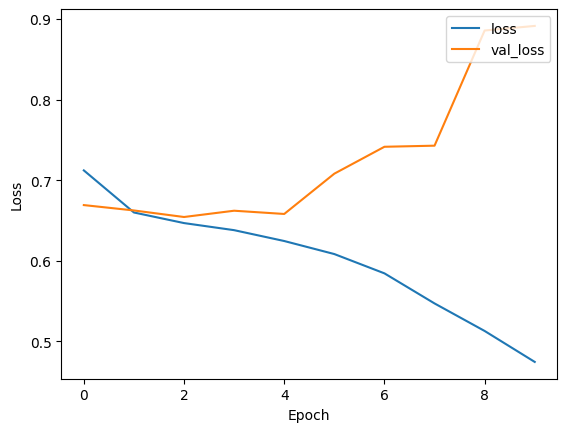

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

plt.plot(modelo_entrenado.history['accuracy'], label='accuracy')
plt.plot(modelo_entrenado.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(modelo_entrenado.history['loss'], label='loss')
plt.plot(modelo_entrenado.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Utilizando tecnicas de regularization

In [15]:
##Con droput
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [16]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Entreno el modelo
model2_trained = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
141/141 [==============================] - 7s 35ms/step - loss: 0.7774 - accuracy: 0.5323 - val_loss: 0.6803 - val_accuracy: 0.5401
Epoch 2/10
141/141 [==============================] - 4s 31ms/step - loss: 0.6743 - accuracy: 0.5961 - val_loss: 0.6656 - val_accuracy: 0.5936
Epoch 3/10
141/141 [==============================] - 4s 29ms/step - loss: 0.6663 - accuracy: 0.6041 - val_loss: 0.6719 - val_accuracy: 0.6203
Epoch 4/10
141/141 [==============================] - 4s 29ms/step - loss: 0.6623 - accuracy: 0.6207 - val_loss: 0.6742 - val_accuracy: 0.5998
Epoch 5/10
141/141 [==============================] - 4s 31ms/step - loss: 0.6575 - accuracy: 0.6180 - val_loss: 0.6650 - val_accuracy: 0.5998
Epoch 6/10
141/141 [==============================] - 4s 31ms/step - loss: 0.6520 - accuracy: 0.6314 - val_loss: 0.6560 - val_accuracy: 0.6337
Epoch 7/10
141/141 [==============================] - 4s 29ms/step - loss: 0.6544 - accuracy: 0.6296 - val_loss: 0.6703 - val_accuracy: 0.5820

36/36 [==============================] - 0s 10ms/step - loss: 0.6566 - accuracy: 0.6310
Loss: 0.6566104292869568
Accuracy: 0.6310160160064697


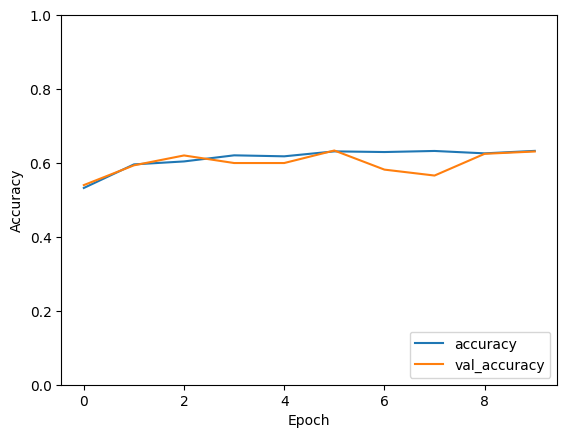

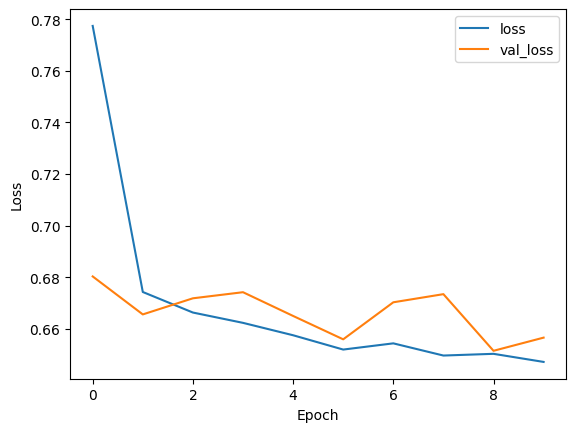

In [18]:
# Evaluamos el modelo
loss, accuracy = model2.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Graficamos la precisión y la pérdida durante el entrenamiento
plt.plot(model2_trained.history['accuracy'], label='accuracy')
plt.plot(model2_trained.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(model2_trained.history['loss'], label='loss')
plt.plot(model2_trained.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [19]:
from tensorflow.keras.regularizers import l2

In [20]:
##Con regularization L2 y dropout

In [21]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [22]:
# Compilo el modelo
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Entreno el modelo
model3_trained = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
141/141 [==============================] - 8s 37ms/step - loss: 1.1569 - accuracy: 0.5446 - val_loss: 0.8601 - val_accuracy: 0.5401
Epoch 2/10
141/141 [==============================] - 4s 31ms/step - loss: 0.8011 - accuracy: 0.5709 - val_loss: 0.7583 - val_accuracy: 0.5971
Epoch 3/10
141/141 [==============================] - 4s 30ms/step - loss: 0.7334 - accuracy: 0.6126 - val_loss: 0.7241 - val_accuracy: 0.6283
Epoch 4/10
141/141 [==============================] - 4s 29ms/step - loss: 0.7106 - accuracy: 0.6178 - val_loss: 0.7030 - val_accuracy: 0.6239
Epoch 5/10
141/141 [==============================] - 4s 31ms/step - loss: 0.6994 - accuracy: 0.6180 - val_loss: 0.6914 - val_accuracy: 0.6310
Epoch 6/10
141/141 [==============================] - 4s 30ms/step - loss: 0.6886 - accuracy: 0.6311 - val_loss: 0.6927 - val_accuracy: 0.5793
Epoch 7/10
141/141 [==============================] - 4s 29ms/step - loss: 0.6853 - accuracy: 0.6104 - val_loss: 0.6980 - val_accuracy: 0.6070

36/36 [==============================] - 0s 9ms/step - loss: 0.6815 - accuracy: 0.6221
Loss: 0.6814521551132202
Accuracy: 0.6221033930778503


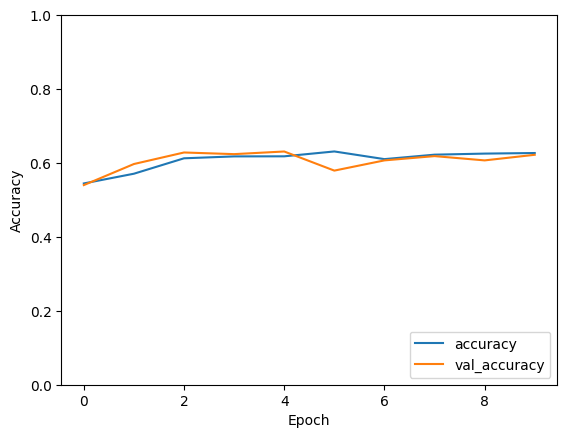

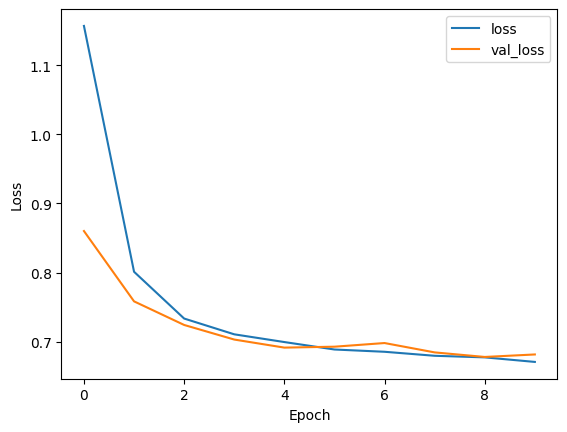

In [25]:
# Evaluo el modelo
loss, accuracy = model3.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Grafica de la precisión y la pérdida durante el entrenamiento
plt.plot(model3_trained.history['accuracy'], label='accuracy')
plt.plot(model3_trained.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(model3_trained.history['loss'], label='loss')
plt.plot(model3_trained.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Se evidencia que el primer modelo ejecutado presenta una curva de accuracy correspondiente a la validacion que se estabiliza muy similarmente a la curva de accuracy del entrenamiento a medida que aumenta el numero de epocas o conforme el modelo va aprendiendo; pero este resultado no es consistente con las curvas de loss para la validacion y entrenamiento, pues indica que hay un sobre ajuste.

Una de las primeras medidas tomadas para mejorar esta situacion fue agregar tecnicas de regularizacion.
El segundo modelo ejecutado utiliza la tecnica de dropout luego de la convolucion y el max pooling. Los resultados de esta primera ejecucion demuestran una mejora y mayor similitud en el proceso de entrenamiento y validacion; no obstante, las metricas mejoran notablemente cuando se implementa un tercer modelo en el que se usan dos tecnicas de regularizacion (dropout y L2 Regularization)